# Logistic Regression (MNIST)

We are going to use the MNIST dataset because it is for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. One of the things we will notice is that parameter tuning can greatly speed up and improve a machine learning algorithm. 

### Downloading the Data (MNIST)

In [ ]:
from sklearn.datasets import fetch_openml
# Change data_home to wherever to where you want to download your data
mnist = fetch_openml('MNIST original')

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


InvalidURL: ignored

In [1]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml("'MNIST original'")
## Load data from https://www.openml.org/d/554

In [2]:
# for the In the latest version of scikit-learn (version 0.23.1), 
#there is nothing named "fetch_mldata()". (That was present in the previous version of 0.19. )
#In the latest version, we need to use fetch_openml().
#https://github.com/ageron/handson-ml/issues/529

from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [4]:
print(type(mnist))
print(type(mnist.data))
#read a element
# print(mnist.data['pixel1'])


<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>


Now that you have the dataset loaded you can use the commands below

In [5]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , mnist.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", mnist.target.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


### Splitting Data into Training and Test Sets (MNIST)

In [6]:
# train : test = 1:6
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)



In [7]:
print(train_img) 
print(type(test_img))
print(type(train_lbl))
print(type(test_lbl))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
print(train_img.shape)

(60000, 784)


In [9]:
print(train_lbl.shape)

(60000,)


In [10]:
print(test_img.shape)

(10000, 784)


In [11]:
print(test_lbl.shape)

(10000,)


### Showing the Images and Labels (MNIST)

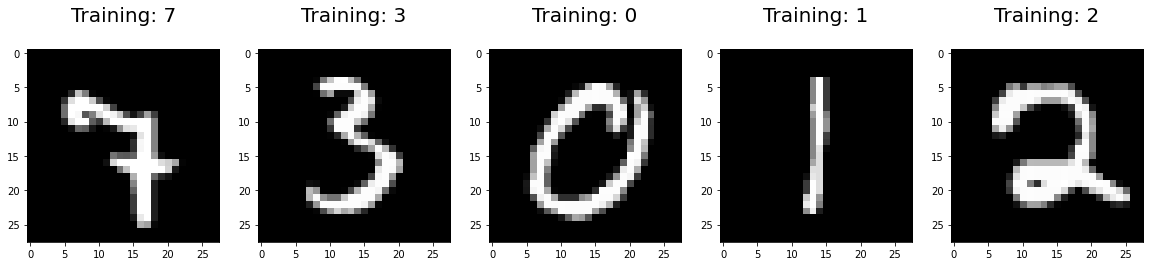

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Showing the Images and Labels(MNIST): 5 images
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

### Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

**Step 1.** Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [14]:
from sklearn.linear_model import LogisticRegression

**Step 2.** Make an instance of the Model

In [18]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs',max_iter=100000)

In [ ]:
'''
https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
LogisticRegression(... solver='lbfgs', max_iter=100 ...)
As you can see, the default solver in LogisticRegression is 'lbfgs' and the maximum number of iterations is 100 by default.

Final words, please, however, note that increasing the maximum number of iterations does not necessarily guarantee convergence, 
but it certainly helps!
'''

**Step 3.** Training the model on the data, storing the information learned from the data

Model is learning the relationship between digits and labels

In [19]:
logisticRegr.fit(train_img, train_lbl)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=100000)

In [ ]:
y_score = logisticRegr.fit(train_img, train_lbl).decision_function(train_lbl)

**Step 4.** Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [47]:
# Returns a NumPy Array
# Predict for One Observation (image)
print(logisticRegr.predict(test_img[0].reshape(1,-1)))

['0']


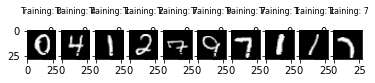

In [26]:
for index, (image, label) in enumerate(zip(test_img[0:10], test_lbl[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 8)

In [27]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '3'], dtype=object)

In [48]:
# Make predictions on entire test data
predictions = logisticRegr.predict(test_img)
print(type(predictions))

<class 'numpy.ndarray'>


In [55]:
print(predictions)

['0' '4' '1' ... '1' '3' '0']


### Measuring Model Performance (MNIST)

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on the new data (test set)

accuracy is defined as: 

(fraction of correct predictions): correct predictions / total number of data points

In [50]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9119


### Display Misclassified images with Predicted Labels (MNIST)

In [30]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

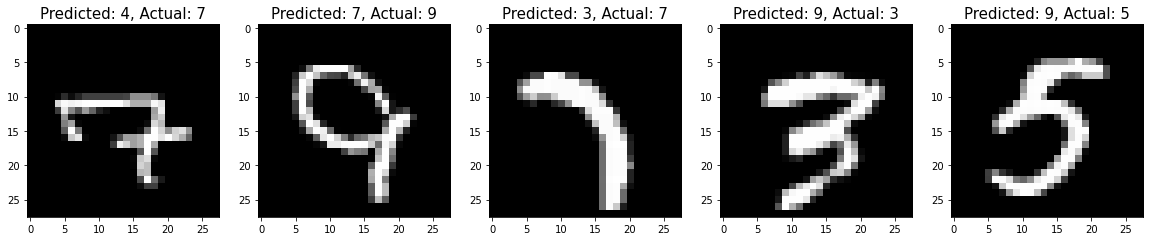

In [31]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [51]:

import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# fpr, tpr, threshold = roc_curve(test_lbl,predictions)
fpr, tpr, thresholds = roc_curve(test_lbl, predictions)
    
    #计算ROC，并绘制曲线
rocauc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('true rate')
plt.xlabel('false rate')
plt.show()


ValueError: multiclass format is not supported

ValueError: LogisticRegression should be a binary classifier

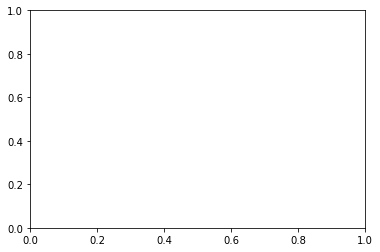

In [36]:

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
#创建画布
fig, ax = plt.subplots()

# svc_roc = plot_roc_curve(svc_clf, X_test, y_test, ax=ax)
lr_clf_roc = plot_roc_curve(logisticRegr,test_img, test_lbl, ax=ax)
# knn_clf_roc = plot_roc_curve(knn_clf, X_test, y_test, ax=ax)

# 参照线
ax.plot([0, 1], [0, 1], linestyle='--', color='r')

<b>if this tutorial doesn't cover what you are looking for, please leave a comment on the youtube video or blog post and I will try to cover what you are interested in. </b>

[youtube video](https://www.youtube.com/watch?v=71iXeuKFcQM)